<a href="https://colab.research.google.com/github/ilitteri/7512-AnalisisNumerico/blob/main/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=1tRDUEoKUNx1abmyV9QE0aHgo5Nt2-TN8" style="display: block;margin-left: auto;margin-right: auto;width: 75%;"></img>

<h1 align="center">[75.12] Análisis Numérico</h1>
<h1 align="center">Trabajo Práctico 2</h1>
<h2 align="center">1<sup>er</sup> Cuatrimestre 2021</h2>

--- 

<h1 align="center" style="font-weight:bold;">Descomposición de señales mediante series de Fourier a través de resolución de problema de cuadrados mínimos</h1>

---

<h3 align="left"><ins>AUTOR<ins></h3>
<p>Sánchez, Juan Pablo (jpsanchez@fi.uba.ar) - 105.865</p>
<p>de Luca Andrea, Felipe (fdeluca@fi.uba.ar) - 105.646</p>
<p>Litteri, Iván (ilitteri@fi.uba.ar) - 106.223</p>
    
<h3 align="left"><ins>CÁTEDRA<ins></h3>
<p>Sassano</p>

<h3 align="left"><ins>FECHA DE ENTREGA<ins></h3>
<p>21 de julio del 2021</p>

<h3 align="left"><ins>LENGUAJE ELEGIDO<ins></h3>
<p>Python</p>

<h3 align="left"><ins>CALIFICACIÓN<ins></h3>
<p></p>

---

*Es importante correr todos los bloques de código si se quiere visualizar algún resultado ya que algunos dependen de bloques previos.*

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import math
np.seterr(all='raise')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

# 1. Forma general de la serie de Fourier de una señal cuadrada

## a) Defina matemáticamente la expresión de una señal cuadrada periódica de amplitud $\{1;−1\}$ volt, periodo $T$ y duty cycle $D_c = 50\%$. El duty cycle se define como $D_c \triangleq \frac{\textrm{Duracion de la parte positiva de la señal}}{\textrm{Duracion total de la señal}} \cdot 100\%.$

Podemos definir la señal cuadrada descrita de la siguiente forma:
$$
V(t)=\left\{
\begin{array}{*{3}{rC}l}
  1V & t \in \left[0, \frac{T}{2}\right)\\
  -1V & t \in \left[\frac{T}{2}, T\right)
\end{array}
\right. \wedge V(t) = V\left(t+T\right)
$$
También es valida la siguiente definición:
$$V(t) = sgn\left(1V sen\left(\frac{2\pi}{T}t\right)\right)$$

## b) Muestre detalladamente el desarrollo de la descomposición en serie de Fourier. Exprese los coeficientes $a_k$ y $b_k$ como números reales y defina el rango del índice $k$ adecuadamente.


Podemos aproximar a la función cuadrada con una serie de Fourier de la siguiente forma:
$$V(t) \approx \frac{1}{2}a_0 + \sum_{n = 0}^k a_n \cos(n\omega t) + \sum_{n = 0}^k b_n \sin (n\omega t)$$
donde $k$ es un entero mayor a $0$, y cuanto más grande sea $k$ la aprioximación será mejor (cuando $k$ tiende a $\infty$ la serie converge a la función original).\
Los $a_{n}$ y $b_{n}$ están dados por:
$$a_n = \frac{2}{T}\int\limits_{\alpha}^{\alpha + T} V(t) \cos(n\omega t) dt
\quad n = 0, 1, 2, ...$$
$$b_n = \frac{2}{T}\int\limits_{\alpha}^{\alpha + T} V(t) \sin (n\omega t) dt
\quad n = 1, 2, 3, ...$$
Entonces:
$$
\begin{aligned}
  a_n &= \frac{2}{T}\int\limits_{0}^{T} V(t) \cos\left(\frac{2\pi n}{T} t\right) dt \\
      &= \frac{2}{T}\left[\int\limits_{0}^{\frac{T}{2}} 1V \cos\left(\frac{2\pi n}{T} t\right) dt - \int\limits_{\frac{T}{2}}^{T} 1V \cos\left(\frac{2\pi n}{T} t\right) dt \right]\\
      &= \frac{2}{T}\left[1V\frac{T}{2\pi n} \sin \left(\frac{2\pi n}{T} t\right)\Bigg|_0^\frac{T}{2} - 1V\frac{T}{2\pi n} \sin \left(\frac{2\pi n}{T} t\right)\Bigg|_\frac{T}{2}^T\right]\\
      &= \frac{1V}{\pi n}\underbrace{\left[ \sin \left(\pi n\right) -  \sin \left(0\right) -  \sin \left(2\pi n\right) +  \sin \left(\pi n\right)\right]}_{0}\\
      &= 0V
\end{aligned}
$$
$$
\begin{aligned}
  b_n &= \frac{2}{T}\int\limits_{0}^{T} V(t) \sin \left(\frac{2\pi n}{T} t\right) dt \\
      &= \frac{2}{T}\left[\int\limits_{0}^{\frac{T}{2}} 1V \sin \left(\frac{2\pi n}{T} t\right) dt - \int\limits_{\frac{T}{2}}^{T} 1V \sin \left(\frac{2\pi n}{T} t\right) dt \right]\\
      &= \frac{2}{T}\left[-1V\frac{T}{2\pi n} \cos\left(\frac{2\pi n}{T} t\right)\Bigg|_0^\frac{T}{2} + 1V\frac{T}{2\pi n} \cos\left(\frac{2\pi n}{T} t\right)\Bigg|_\frac{T}{2}^T\right]\\
      &= \frac{1V}{\pi n}\left[- \cos\left(\pi n\right) +  \cos\left(0\right) +  \cos\left(2\pi n\right) -  \cos\left(\pi n\right)\right]\\
      &= \frac{2}{\pi n}V\left[1 -  \cos\left(\pi n\right)\right]\\
      &= \left\{
            \begin{array}{*{3}{rC}l}
              0V & \text{si n es par}\\
              \frac{4}{\pi n}V & \text{si n es impar}
            \end{array}
        \right.
\end{aligned}
$$


##c) En términos numéricos, por qué cree que es mejor utilizar una representación en serie de Fourier en vez de la señal cuadrada?

<p align = "justify">
La señal cuadrada tiene una discontinuidad cada vez que cambia de signo. La ventaja de usar una representación en serie de Fourier es que esta discontinuidad o salto se corrige tomando el valor promedio de la misma, sin afectar notablemente el error general de la aproximación.
</p>

# 2. Determinación  de  coeficientes  de  Fourier  por  ajuste  de funciones

La señal cuadrada se puede expresar como una serie de Fourier de la siguiente manera

$$
x(t) = a_0 + \sum_{k = 0}^{\infty} a_n \cos (n \omega_{0} t) + \sum_{k = 0}^{\infty} b_n \sin (n \omega_{0} t)
\quad \text{con } \omega_{0} = \frac{2\pi}{T}
$$

Dado que no es posible evaluar los infinitos términos de la descomposición, se requiere encontrar los coeficientes de la serie de Fourier utilizando una aproximación por cuadrados mínimos. Se solicita:

## a) Si la cantidad máxima de términos a computar es $k_{max}$, determine la expresión de la función de ajuste $s(t)$ a utilizar.

La expresión de ajuste a utilizar será:
$$
s(t) = a_0 + \sum_{k = 1}^{k_{max}} a_k \cos (k \omega_{0} t) + \sum_{k = 1}^{k_{max}} b_k \sin (k \omega_{0} t)
\quad \text{con } \omega_{0} = \frac{2\pi}{T}
$$
También podemos considerar que  la señal original esta centrada en $s(t)=0$, es decir no tiene componente continua, entonces el término $a_0=0$ por lo que podemos descartarlo para simplificar el sistema:
$$
s(t) = \sum_{k = 1}^{k_{max}} a_k \cos (k \omega_{0} t) + \sum_{k = 1}^{k_{max}} b_k \sin (k \omega_{0} t)
\quad \text{con } \omega_{0} = \frac{2\pi}{T}
$$


## b) Desarrolle y detalle el procedimiento que lleva a la formulación de las ecuaciones normales para resolver el problema de cuadrados mínimos planteado.

La resolución de este problema por cuadrados mínimos consiste en resolver el sistema de $n$ puntos $(t_i, V(t_i))$ en el intervalo de $t \in [0, T)$, con las siguientes matrices:
$$ \small{\underbrace{\begin{pmatrix}
  \cos\left(\frac{2\pi}{T} t_1\right) & \sin\left(\frac{2\pi}{T} t_1\right) & \cos\left(\frac{4\pi}{T} t_1\right) & \sin\left(\frac{4\pi}{T} t_1\right) & ... & \cos\left(\frac{2k_{max}\pi}{T} t_1\right) & \sin\left(\frac{2k_{max}\pi}{T} t_1\right)\\
  \cos\left(\frac{2\pi}{T} t_2\right) & \sin\left(\frac{2\pi}{T} t_2\right) & \cos\left(\frac{4\pi}{T} t_2\right) & \sin\left(\frac{4\pi}{T} t_2\right) & ... & \cos\left(\frac{2k_{max}\pi}{T} t_2\right) & \sin\left(\frac{2k_{max}\pi}{T} t_2\right)\\
  ... \\
  \cos\left(\frac{2\pi}{T} t_n\right) & \sin\left(\frac{2\pi}{T} t_n\right) & \cos\left(\frac{4\pi}{T} t_n\right) & \sin\left(\frac{4\pi}{T} t_n\right) & ... & \cos\left(\frac{2k_{max}\pi}{T} t_n\right) & \sin\left(\frac{2k_{max}\pi}{T} t_n\right)
\end{pmatrix}}_A \cdot \underbrace{\begin{pmatrix}
  a_1 \\
  b_1 \\
  ... \\
  a_{k_{max}} \\
  b_{k_{max}}
\end{pmatrix}}_x + E = \underbrace{\begin{pmatrix}
  V(t_1) \\
  V(t_2) \\
  ... \\
  V(t_n)
\end{pmatrix}}_y}
$$

De forma de encontrar una solución $x$ al sistema en la que se minimice el error cuadrático dado por $\|E\|^2$ donde $E = y - Ax$.

En otras palabras, se buscan las $\;x \; \in \; \mathbb{R}^{2k_{max}}\; /\; \|y-Ax\|\; \leq \; \|y-A\xi\| \;\; \forall \;\; \xi \; \in \; \mathbb{R}^{2k_{max}}$.

Sabemos que $\|y-Ax\|$ es mínima cuando $\|Ax\|$ es la proyección ortogonal de y sobre el espacio $Col(A), \;proy_{Col(A)}(y).$ Esto es así por el Teorema de Pitágoras: para dos vectores $u, v$ ortogonales vale que $\|u\|^2+\|v\|^2 = \|u + v\|^2$.

En este caso, si suponemos que $y - Ax \perp Col(A)$, entonces (con $u = y-Ax, v = Ax - A\xi \in Col(A)$):

$$\|y-Ax\|^2 + \|Ax - A\xi\|^2 = \|y - Ax + Ax - A\xi\|^2$$

$$\Rightarrow \|y - Ax\|^2 \leq \|y - A\xi\|^2, \forall \xi \in \mathbb{R}^{2k_{max}}$$
<p align = "center">
<img src="https://i.imgur.com/ufYC4to.png" width="400"/>
</p>
Por lo tanto, para que $\|E\|$ sea mínimo, $E=y-Ax$ y va a pertenecer al subespacio ortogonal a $Col(A)$, $Col(A)^\perp$. Pero tenemos que $Col(A)^\perp = Nul(A^T)$ por lo que $A^TE = A^T(y-Ax) = 0 \Rightarrow$ podemos encontrar $x$ resolviendo el sistema $A^T Ax = A^T y$.

## c) Dado que se tiene un problema de aproximación, exprese matemáticamente la relación que debe cumplir la cantidad de muestras a tomar de la función a aproximar.

Viendo la ecuación original planteada en el item (b) de $Ax + E = b$, con $\|E\|$ mínimo, se trata de un sistema de ecuaciones lineal de $n$ ecuaciones y $2k_{max}$ incógnitas.

Si tuvieramos $n \lt 2k_{max}$, es decir menos ecuaciones que incógnitas, entonces nos daría todo un subespacio posible de soluciones interpoladoras. Con $n = 2k_{max}$, sería un interpolador único.

 Por lo que, para que el sistema tenga una solución única con error cuadrático mínimo y tenga sentido aplicar este método y hablar de cuadrados mínimos, se debe cumplir que $n \gt 2k_{max}$.

## c) Muestre la forma que debe tener el sistema a resolver y la función $s(t)$ para $k_{max} = 1, 3, 144$.

Para $k=1$:
$$ A = \begin{pmatrix}
  \cos\left(\frac{2\pi}{T} t_1\right) & \sin\left(\frac{2\pi}{T} t_1\right) \\
  \cos\left(\frac{2\pi}{T} t_2\right) & \sin\left(\frac{2\pi}{T} t_2\right) \\
  \vdots & \vdots \\
  \cos\left(\frac{2\pi}{T} t_n\right) & \sin\left(\frac{2\pi}{T} t_n\right)
\end{pmatrix},\;
x = \begin{pmatrix}
  a_1 \\
  b_1
\end{pmatrix},\;
y = \begin{pmatrix}
  V(t_1) \\
  V(t_2) \\
  \vdots \\
  V(t_n)
\end{pmatrix} $$

$$\Rightarrow A^TA = \sum_{i=1}^n\begin{pmatrix}
  \cos^2(\frac{2\pi}{T}t_i) &\cos(\frac{2\pi}{T}t_i)\sin(\frac{2\pi}{T}t_i) \\
  \cos(\frac{2\pi}{T}t_i)\sin(\frac{2\pi}{T}t_i) & \sin^2(\frac{2\pi}{T}t_i)
\end{pmatrix}$$

$$\Rightarrow A^Ty = \sum_{i=1}^n\begin{pmatrix}
  \cos(\frac{2\pi}{T}t_i)V(t_i) \\
  \sin(\frac{2\pi}{T}t_i)V(t_i)
\end{pmatrix}$$

$$\therefore s(t) = a_1 \cos(\frac{2\pi}{T}t) + b_1 \sin(\frac{2\pi}{T}t)$$

Para $k=3$:
$$ A = \begin{pmatrix}
  \cos\left(\frac{2\pi}{T} t_1\right) & \sin\left(\frac{2\pi}{T} t_1\right) & \cos\left(\frac{4\pi}{T} t_1\right) & \sin\left(\frac{4\pi}{T} t_1\right) & \cos\left(\frac{6\pi}{T} t_1\right) & \sin\left(\frac{6\pi}{T} t_1\right)\\
  \cos\left(\frac{2\pi}{T} t_2\right) & \sin\left(\frac{2\pi}{T} t_2\right) & \cos\left(\frac{4\pi}{T} t_2\right) & \sin\left(\frac{4\pi}{T} t_2\right) & \cos\left(\frac{6\pi}{T} t_2\right) & \sin\left(\frac{6\pi}{T} t_2\right)\\
  \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
  \cos\left(\frac{2\pi}{T} t_n\right) & \sin\left(\frac{2\pi}{T} t_n\right) & \cos\left(\frac{4\pi}{T} t_n\right) & \sin\left(\frac{4\pi}{T} t_n\right) & \cos\left(\frac{6\pi}{T} t_n\right) & \sin\left(\frac{6\pi}{T} t_n\right)\\
\end{pmatrix},$$
$$x = \begin{pmatrix}
  a_1 \\
  b_1 \\
  a_2 \\
  b_2 \\
  a_3 \\
  b_3
\end{pmatrix},\;
y = \begin{pmatrix}
  V(t_1) \\
  V(t_2) \\
  \vdots \\
  V(t_n)
\end{pmatrix} $$

$$\Rightarrow A^TA = \sum_{i=1}^n\begin{pmatrix}
  \cos^2(\frac{2\pi}{T}t_i) &\cos(\frac{2\pi}{T}t_i)\sin(\frac{2\pi}{T}t_i) & \cos(\frac{2\pi}{T}t_i)\cos(\frac{4\pi}{T}t_i) & \cos(\frac{2\pi}{T}t_i)\sin(\frac{4\pi}{T}t_i) & \cos(\frac{2\pi}{T}t_i)\cos(\frac{6\pi}{T}t_i) & \cos(\frac{2\pi}{T}t_i)\sin(\frac{6\pi}{T}t_i) \\
  \sin(\frac{2\pi}{T}t_i)\cos(\frac{2\pi}{T}t_i) & \sin^2(\frac{2\pi}{T}t_i) & \sin(\frac{2\pi}{T}t_i)\cos(\frac{4\pi}{T}t_i) & \sin(\frac{2\pi}{T}t_i)\sin(\frac{4\pi}{T}t_i) & \sin(\frac{2\pi}{T}t_i)\cos(\frac{6\pi}{T}t_i) & \sin(\frac{2\pi}{T}t_i)\sin(\frac{6\pi}{T}t_i) \\
  \cos(\frac{4\pi}{T}t_i)\cos(\frac{2\pi}{T}t_i) & \cos(\frac{4\pi}{T}t_i)\sin(\frac{2\pi}{T}t_i) & \cos^2(\frac{4\pi}{T}t_i) & \cos(\frac{4\pi}{T}t_i)\sin(\frac{4\pi}{T}t_i) & \cos(\frac{4\pi}{T}t_i)\cos(\frac{6\pi}{T}t_i) & \cos(\frac{4\pi}{T}t_i)\sin(\frac{6\pi}{T}t_i) \\
  \sin(\frac{4\pi}{T}t_i)\cos(\frac{2\pi}{T}t_i) & \sin(\frac{4\pi}{T}t_i)\sin(\frac{2\pi}{T}t_i) & \sin(\frac{4\pi}{T}t_i)\cos(\frac{4\pi}{T}t_i) & \sin^2(\frac{4\pi}{T}t_i) & \sin(\frac{4\pi}{T}t_i)\cos(\frac{6\pi}{T}t_i) & \sin(\frac{4\pi}{T}t_i)\sin(\frac{6\pi}{T}t_i) \\
  \cos(\frac{6\pi}{T}t_i)\cos(\frac{2\pi}{T}t_i) & \cos(\frac{6\pi}{T}t_i)\sin(\frac{2\pi}{T}t_i) & \cos(\frac{6\pi}{T}t_i)\cos(\frac{4\pi}{T}t_i) & \cos(\frac{6\pi}{T}t_i)\sin(\frac{4\pi}{T}t_i) & \cos^2(\frac{6\pi}{T}t_i) & \cos(\frac{6\pi}{T}t_i)\sin(\frac{6\pi}{T}t_i) \\
  \sin(\frac{6\pi}{T}t_i)\cos(\frac{2\pi}{T}t_i) & \sin(\frac{6\pi}{T}t_i)\sin(\frac{2\pi}{T}t_i) & \sin(\frac{6\pi}{T}t_i)\cos(\frac{4\pi}{T}t_i) & \sin(\frac{6\pi}{T}t_i)\sin(\frac{4\pi}{T}t_i) & \sin(\frac{6\pi}{T}t_i)\cos(\frac{6\pi}{T}t_i) & \sin^2(\frac{6\pi}{T}t_i)
\end{pmatrix}$$

$$\Rightarrow A^Ty = \sum_{i=1}^n\begin{pmatrix}
  \cos(\frac{2\pi}{T}t_i)V(t_i) \\
  \sin(\frac{2\pi}{T}t_i)V(t_i) \\
  \cos(\frac{4\pi}{T}t_i)V(t_i) \\
  \sin(\frac{4\pi}{T}t_i)V(t_i) \\
  \cos(\frac{6\pi}{T}t_i)V(t_i) \\
  \sin(\frac{6\pi}{T}t_i)V(t_i)
\end{pmatrix}$$

$$\therefore s(t) = a_1 \cos(\frac{2\pi}{T}t) + b_1 \sin(\frac{2\pi}{T}t) + a_2 \cos(\frac{4\pi}{T}t) + b_2 \sin(\frac{4\pi}{T}t) + a_3 \cos(\frac{6\pi}{T}t) + b_3 \sin(\frac{6\pi}{T}t)$$


Para $k=144$:

$$ A = \begin{pmatrix}
  \cos\left(\frac{2\pi}{T} t_1\right) & \sin\left(\frac{2\pi}{T} t_1\right) & ... & \cos\left(\frac{288\pi}{T} t_1\right) & \sin\left(\frac{288\pi}{T} t_1\right)\\
  \vdots & \vdots & \ddots & \vdots & \vdots \\
  \cos\left(\frac{2\pi}{T} t_n\right) & \sin\left(\frac{2\pi}{T} t_n\right) & ... & \cos\left(\frac{288\pi}{T} t_n\right) & \sin\left(\frac{288\pi}{T} t_n\right)\\
\end{pmatrix},$$
$$x = \begin{pmatrix}
  a_1 \\
  b_1 \\
  \vdots \\
  a_{144} \\
  b_{144}
\end{pmatrix},\;
y = \begin{pmatrix}
  V(t_1) \\
  V(t_2) \\
  \vdots \\
  V(t_n)
\end{pmatrix} $$

$$\Rightarrow A^TA = \sum_{i=1}^n\begin{pmatrix}
  \cos^2(\frac{2\pi}{T}t_i) & \cos(\frac{2\pi}{T}t_i)\sin\left(\frac{2\pi}{T} t_1\right) & ... & \cos(\frac{2\pi}{T}t_i)\cos(\frac{288\pi}{T}t_i) & \cos(\frac{2\pi}{T}t_i)\sin(\frac{288\pi}{T}t_i) \\
  \sin(\frac{2\pi}{T}t_i)\cos(\frac{2\pi}{T}t_i) & \sin^2(\frac{2\pi}{T}t_i) & ... & \sin(\frac{2\pi}{T}t_i)\cos(\frac{288\pi}{T}t_i) & \sin(\frac{2\pi}{T}t_i)\sin(\frac{288\pi}{T}t_i) \\
  \vdots & \vdots & \ddots & \vdots & \vdots  \\
  \cos(\frac{288\pi}{T}t_i)\cos(\frac{2\pi}{T}t_i) & \cos(\frac{288\pi}{T}t_i)\sin(\frac{2\pi}{T}t_i) & ... & \cos^2(\frac{288\pi}{T}t_i) & \cos(\frac{288\pi}{T}t_i)\sin(\frac{288\pi}{T}t_i) \\
  \sin(\frac{288\pi}{T}t_i)\cos(\frac{2\pi}{T}t_i) & \sin(\frac{288\pi}{T}t_i)\sin(\frac{2\pi}{T}t_i) & ... & \sin(\frac{288\pi}{T}t_i)\cos(\frac{288\pi}{T}t_i) & \sin^2(\frac{288\pi}{T}t_i)
\end{pmatrix}$$

$$\Rightarrow A^Ty = \sum_{i=1}^n\begin{pmatrix}
  \cos(\frac{2\pi}{T}t_i)V(t_i) \\
  \sin(\frac{2\pi}{T}t_i)V(t_i) \\
  \vdots \\
  \cos(\frac{288\pi}{T}t_i)V(t_i) \\
  \sin(\frac{288\pi}{T}t_i)V(t_i)
\end{pmatrix}$$

$$\therefore s(t) = a_1 \cos(\frac{2\pi}{T}t) + b_1 \sin(\frac{2\pi}{T}t) + \;...\; + a_{144} \cos(\frac{288\pi}{T}t) + b_{144} \sin(\frac{288\pi}{T}t)$$

In [ ]:
# FUNCIONES AUXILIARES

def traspuesta(A):
  T = np.zeros(np.shape(A)[::-1])
  for i in range(np.shape(A)[1]):
    for j in range(np.shape(A)[0]):
      T[i][j] = A[j][i]
  return T

# Devuelve las matrices del sistema de cuadrados mínimos
def matrices_cuadrados_min(x, y, k_max, periodo):
  A = np.zeros((len(x), 2*k_max))
  for i, x in enumerate(x):
    for j in range(k_max):
      fase = np.pi*2*(j+1)*x / periodo
      A[i][2*j] = np.cos(fase)
      A[i][2*j+1] = np.sin(fase)

  b = np.array([z for z in y])
  At = traspuesta(A)
  return At @ A, At @ b

def funcion_cuadrada(x, amplitud, periodo):
  return amplitud if ((x % periodo) / periodo < 0.5) else -amplitud

# Devuelve solución de Ax=b para una matriz A triangulada.
# n es el tamaño de la matriz y superior indica si la matriz
# es triangular superior o inferior
def resolver_triangulada(A, b, n, superior = True):
    x = np.zeros(n)
    if superior:
        A = np.array([x[::-1] for x in A[::-1]])
        b = b[::-1]

    for j in range(n):
        der = b[j]
        for k in range(j):
            der -= A[j, k] * x[k]

        if (math.isclose(A[j, j], 0)):
            raise ZeroDivisionError

        x[j] = der / A[j, j]

    return x if not superior else x[::-1]

# Devuelve la imágen de los puntos del eje x para los coeficientes de cada k
def y_fourier(coeficientes, eje_x, K_A_CALCULAR):
  y_fourier = {}
  for k_max in K_A_CALCULAR:
    y_fourier[k_max] = np.zeros(len(eje_x))
    for i, x in enumerate(eje_x):
      for j, coef in enumerate(coeficientes[k_max]):
        k = (j + 1) // 2
        if (j % 2 == 0):
          y_fourier[k_max][i] += np.cos(np.pi*2*k*x)*coef 
        else:
          y_fourier[k_max][i] += np.sin(np.pi*2*k*x)*coef
  return y_fourier

# Devuelve el triángulo superior o inferior, segun el parámetro superior,
# de la matriz A. k indica a partir de que diagonal incluir relativo a la
# principal. (misma funcionalidad que np.tril() y np.triu(), 2 en 1)
def tri(A, k = 0, superior = True):
  T = np.zeros(np.shape(A))
  if not superior:
    A = np.array([x[::-1] for x in A[::-1]])

  for i in range(len(T)):
    for j in range(k + i, len(T)):
      T[i][j] = A[i][j]

  return T if superior else np.array([x[::-1] for x in T[::-1]])

In [ ]:
# Constantes varias para los puntos 3 y 4
PERIODO = 1 # En ms para gráfico
AMPLITUD = 1 # En V para gráfico
CANT_PERIODOS = 1
MUESTRAS = 432
X = np.linspace(0, CANT_PERIODOS * PERIODO, MUESTRAS, endpoint = False)
Y = [funcion_cuadrada(i, AMPLITUD, PERIODO) for i in X]
K_A_CALCULAR = (1, 3, 13, 34, 55, 144)

matrices_cmin = {} # Guarda matriz A y b del sistema Ax=b de cuadrados mínimos, para cada k_max
for k_max in K_A_CALCULAR:
  matrices_cmin[k_max] = matrices_cuadrados_min(X, Y, k_max, PERIODO)

In [ ]:
# Funcion para graficar en el punto 3 y 4

# Ajustar estas 2 constantes y re-ejecutar para modificar gráfico
PLOT_CANT_PERIODOS = 1
PLOT_CANT_MUESTRAS = 1000
PLOT_X = np.linspace(0, PLOT_CANT_PERIODOS * PERIODO, PLOT_CANT_MUESTRAS, endpoint = False)
PLOT_Y_CUADRADA = [funcion_cuadrada(i, AMPLITUD, PERIODO) for i in PLOT_X]

def graficar(y):
  plt.rcParams["figure.figsize"] = (15,5)
  plt.plot(PLOT_X, PLOT_Y_CUADRADA, label=r'cuadrada')
  for k_max in K_A_CALCULAR:
    plt.plot(PLOT_X, y[k_max], label=(r'$k_{max} = $' + f"{k_max}"))

  plt.ylabel('Tensión [V]')
  plt.xlabel('Tiempo [ms]')
  plt.legend()
  plt.show()

#  3. Resolución mediante eliminación gaussiana con pivoteo parcial

## a) Describa en no más de 1 página el método de eliminación gaussiana con pivoteo parcial.

Este método propone la eliminación progresiva de variables por medio de transformaciones elementales en el sistema de ecuaciones, hasta obtener solo una ecuación con una incógnita. Una vez resuelta se realiza sustitución regresiva hasta obtener los valores de cada variable.

Esta técnica minimiza los errores de truncamiento por ceros en la diagonal o los errores de redondeo por números cercanos a cero, la cual consiste en ubicar en la fila pivote o de referencia el término de mayor magnitud de esa columna y finalmente se procede a realizar el método de eliminación Gaussiana simple para obtener los valores de las variables.

El procedimiento para realizar una eliminación Gaussiana con pivoteo parcial se describe a continuación:

1. Se construye una matriz de coeficientes y el vector con los términos independientes para después crear la matriz aumentada.
2. Se busca en la primera columna de la matriz el mayor número (en valor absoluto) y dicho valor se ubica en la primera fila
3. Se procede a hacer la eliminación Gaussiana y se pasa a la segunda columna de la matriz.
4. En la segunda columna de la matriz, desde la posición $a_{22}$ se busca el mayor número (en valor absoluto) y se ubica en esta posición.
5. Se vuele a realizar el método de la eliminación Gaussiana y se repite el mismo proceso anterior hasta que los elementos de la diagonal tomen los valores de su respectiva columna.

### Algoritmo de eleminación gaussiana con pivoteo parcial \[Burden, pág. 282\]

Para resolver el sistema lineal $n \times n$
$$
\begin{aligned}
    E_{1}: a_{11}x_{1} + a_{12}x_{2} + &... + a_{1,n}x_{n} = a_{1,n+1}\\
    E_{2}: a_{21}x_{1} + a_{22}x_{2} + &... + a_{2,n}x_{n} = a_{2,n+1}\\
                                       &...\\
    E_{n}: a_{n1}x_{1} + a_{n2}x_{2} + &... + a_{n,n}x_{n} = a_{n,n+1}\\
\end{aligned}
$$

Tenemos como entrada en el método el número de incógnitas y ecuaciones $n$; matriz aumentada $A = [a_{ij}]$ donde $1 \leq i \leq n$ y $1 \leq j \leq n+1$.
Y como salida la solución $x_{1}, ..., x_{n}$.

Luego los pasos:

> Paso 1. Para $i = 1, ..., n$ se inicializan las fila.

> Paso 2. Para $i = 1, ..., n-1$ realizar los pasos 3 a 6 (Proceso de eliminación).

> Paso 3. Sea $p$ el entero más pequeño con $i \leq p \leq n$ y $|a(FILA(p),i| = max_{i \leq j \leq n}|a(FILA(j),i)|$ (*Notación:* $a(FILA(i),j) \equiv a_{FILA_{i},j}$)

> Paso 4. Si $a(FILA(p), i) = 0$ entonces no existe solución única.

> Paso 5. Si $FILA(i) \neq FILA(p)$ entonces se intercambia las filas FILA(i) y FILA(p).

> Paso 6. Para $j = i + 1, ..., n$ realizar los pasos 7 y 8.

> Paso 7. Determinar m(FILA(j),i) = $\frac{a(FILA(j), i)}{a(FILA(i), i)}$.

> Paso 8. Realizar $(E_{FILA(j)} - m(FILA(j), i) \cdot E_{FILA}(i)) \rightarrow (E_{FILA(j)})$.

> Paso 9. Si $a(FILA(n), n) = 0$ entonces no existe solución única.

> Paso 10. Se inicia la sustición hacia atrás determinando $x_{n} = \frac{a(FILA(n), n+1)}{a(FILA(n), n)}$.

> Paso 11. Para $i = n-1, ..., 1$ se determina $$x_{i} = \frac{a(FILA(i), n+1) - \sum_{j=i+1}^{n}a(FILA(i), j) \cdot x_{j}}{a(FILA(i), i)}.$$

> Paso 12. Se devuelve la solución $(x_{1}, ..., x_{n})$ (*Proceso finalizado con éxito*).

Cada multiplicador $m_{ij}$ en el método de pivoteo parcial tiene una magnitud menor o igual que 1. A pesar de que esta estrategia es suficiente para muchos sistemas lineales, surgen situaciones en las que es inadecuada.

##b) Implementar en Python3 la resolución del sistema de ecuaciones planteado para un $k_{max}$ genérico utilizando el método de Gauss con pivoteo parcial.

In [ ]:
def encontrar_indice_de_pivote(matriz_aumentada, numero_columna):
    sub_columna = matriz_aumentada[numero_columna:, numero_columna]
    pivote = sub_columna[0]
    for elemento in sub_columna:
        if elemento > pivote:
            pivote = elemento
    return list(sub_columna).index(pivote)


def elevarFilaConPivote(matriz_aumentada, indice_pivote):
    if indice_pivote != 0:
        matriz_aumentada[[0, indice_pivote]] = matriz_aumentada[[indice_pivote, 0]]


def triangular(matriz, pivote, rango):
    for i in range(pivote+1, rango):
        matriz[i] -= (matriz[pivote] * matriz[i, pivote]) / matriz[pivote, pivote]
        if (math.isclose(matriz[pivote][pivote], 0)):
            raise ZeroDivisionError

def eliminacion_gaussiana_pivoteo_parcial(A: np.matrix, b: np.matrix):
    matriz_aumentada = np.concatenate((A, b), axis=1)
    n = len(A)
    for k in range(n-1):
        indice_pivote = encontrar_indice_de_pivote(matriz_aumentada, numero_columna=k)
        elevarFilaConPivote(matriz_aumentada, indice_pivote)
        triangular(matriz_aumentada, k, n)
        
    return resolver_triangulada(matriz_aumentada[:,:-1], matriz_aumentada[:, n], n)

##c) Con el algoritmo implementado, calcular los coeficientes de Fourier para cada $k_{max} = {1,3,13,34,55,144}$. Tome 432 muestras de la función cuadrada y un periodo de 1ms. No hace falta mostrar los valores.

In [ ]:
coeficientes_g = {}

for k_max in K_A_CALCULAR:
  coeficientes_g[k_max] = eliminacion_gaussiana_pivoteo_parcial(matrices_cmin[k_max][0], traspuesta((matrices_cmin[k_max][1],)))

## d) Graficar 1000 muestras de un periodo de la señal cuadrada ideal superpuesta con las curvas obtenidas para cada kmax utilizando la serie de Fourier correspondiente.


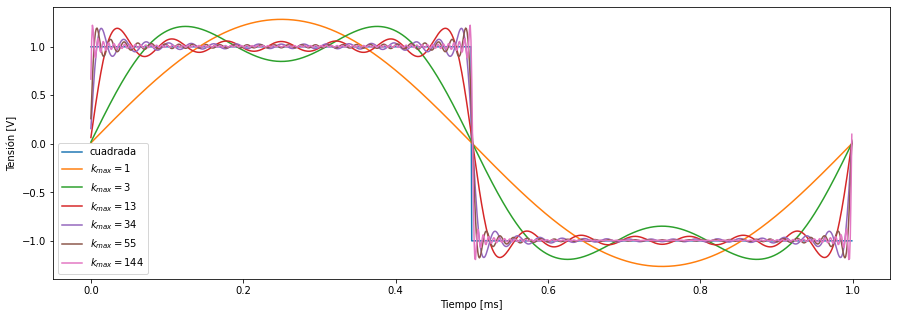

In [ ]:
y_g = y_fourier(coeficientes_g, PLOT_X, K_A_CALCULAR)
graficar(y_g)

## e) Cuántos valores de $k$ cree que son necesarios para representar en forma exacta a la función cuadrada? Por qué?

<p align = "justify">
Antes de estudiar las series de Fourier enunciamos las hipótesis de Dirichlet:
</p>

*    La función ha de ser absolutamente integrable
*    En cualquier intervalo de tiempo la función tiene un n° finito de máximos y mínimos
*    En cualquier intervalo finito de tiempo hay un número finito de discontinuidades, y además han de ser de amplitud finita.

<p align = "justify">
Cumpliéndose lo anterior podemos decir que la función en cuestión puede ser estudiada mediante series de Fourier, y además, podemos afirmar que las hipótesis antedichas nos aseguran también la convergencia de la misma.
Sabemos que, si una función dada se aproxima mediante una Serie de Fourier Finita, habrá un error considerable cerca de la discontinuidad, la cual no depende de los términos $k$ que se quieran emplear. Por más grande $k$ que se tome, la discontinuidad no va a desaparecer. Este efecto se conoce como el error de Gibbs. A medida que aumenta el número de elementos de la serie finita de Fourier que aproxima a la función, la sobre oscilación se va comprimiendo más hacia la discontinuidad, aunque su valor permanezca prácticamente constante. Afortunadamente, la energía asociada a esta sobre oscilación se va haciendo cero. Esto hace que su presencia carezca de importancia.
</p>
<p align = "center">
<img src="https://i.imgur.com/GKETeYl.png" width=500"></img>
</p>

#4. Resolución mediante el método iterativo de Gauss-Seidel


## a) Describa en no más de 1 página el método iterativo de Gauss-Seidel.

<p align = "justify">
El método de Gauss-Seidel es un método iterativo, similar al de Jacobi, solo que en vez de utilizar los valores de la iteración anterior para calcular todos los de la iteración siguiente, también se aprovechan los valores de la iteración actual.
</p>
<p align = "justify">
Teniendo un sistema $Ax = b$ con $A = \begin{pmatrix}
  a_{11} & a_{12} & ... & a_{1n} \\
  a_{21} & a_{22} & ... & a_{2n} \\
  \vdots & \vdots & \ddots & \vdots\\
  a_{n1} & a_{n2} & ... & a_{nn} \\
\end{pmatrix},\; x = \begin{pmatrix}
  x_1 \\
  x_2 \\
  \vdots \\
  x_n
\end{pmatrix}\; \text{y}\;\; b = \begin{pmatrix}
  b_1 \\
  b_2 \\
  \vdots \\
  b_n
\end{pmatrix}$, el método propone encontrar los valores de $x_i$ de cada iteración despejando cada término de la diagonal de $A$ en cada ecuación y usar los valores anteriores para encontrar los nuevos. La diferencia de este método con el de Jacobi es que aprovecha los valores $x_i$ ya encontrados de la iteración actual para encontrar los siguientes dentro de la misma iteración.
 </p>
 <p align = "justify">
El sistema entonces queda:
$$
\left\{
\begin{array}{*{3}{rC}l}
  a_{11}x_1^k & = && -a_{12}x_2^{k-1}& -a_{13}x_3^{k-1}& -\;... & -a_{1n}x_n^{k-1} & + b_1\\
  a_{22}x_2^k & = & -a_{21}x_1^{k}&& -a_{23}x_3^{k-1}& -\;... & -a_{2n}x_n^{k-1} & + b_2 \\
  a_{3}x_3^k & = & -a_{31}x_1^{k}& -a_{32}x_3^{k}&& -\;... & -a_{3n}x_n^{k-1} & + b_3 \\
  \vdots \\
  a_{nn}x^k & = & -a_{n1}x_1^{k}& -a_{n2}x_2^{k}& -a_{n3}x_3^{k}& -\;...&& + b_n
\end{array}
\right.
$$
</p>
<p align = "justify">
Podemos entonces escribir esto de manera matricial descomponiendo la matriz A tal que $A = D - L - U$, donde $D$ es una matriz diagonal que contiene los elementos de la diagonal de $A$, $L$ es una matriz triangular inferior con los elementos del triángulo inferior de $A$ negados y $U$ es una matriz triangular superior con los elementos de ltriángulo superior de $A$ negados.
</p>
<p align = "justify">
Por lo tanto, reescribiendo el sistema planteado, tenemos que $Dx^k = Ux^{k-1} + Lx^k +b \Rightarrow (D-L)x^k = Ux^{k-1} + b$, quedándonos para resolver un sistema donde $(D-L)$ es una matriz triangular inferior.
</p>
<p align = "justify">
Para que exista solución única para $x^k$, los elementos de la diagonal de $(D-L)$ deben ser distintos de 0, es decir $a_{ii} \neq 0$.
</p>
<p align = "justify">
Si tomamos la expresión anterior y multiplicamos por la matriz $(D-L)^{-1}$ nos queda $x^k = (D-L)^{-1}Ux^{k-1} + (D-L)^{-1}b$, donde $T_G = (D-L)^{-1}U$ es la matriz del método de Gauss-Seidel.
</p>

##b) Implementar en Python3 la resolución del sistema de ecuaciones planteado para un $k_{max}$ genérico utilizando el método de Gauss-Seidel.

In [ ]:
# Por default x_0 vale 0. Devuelve x y la cantidad de iteraciones realizadas
def gauss_seidel(A, b, x_0 = None, max_iter = 1000, corte = 0):
  n = A.shape[1]
  if (x_0 is None):
    x_0 = np.zeros(n)

  x = [x_0]
  # P = (D - L)
  P =  tri(A, superior = False)
  U = -tri(A, k = 1)

  for i in range(max_iter):
    x.append(resolver_triangulada(P, U @ x[i] + b, n, superior = False))

    div = np.linalg.norm(x[i + 1], np.Inf)
    if (math.isclose(div, 0)):
         raise ZeroDivisionError
    variacion = np.linalg.norm(x[i + 1] - x[i], np.Inf) / div

    if (variacion < corte):
      break

  return x[-1], len(x) - 1

##c) Con el algoritmo implementado, calcular los coeficientes de Fourier para cada $k_{max} = {1,3,13,34,55,144}$. Tome 432 muestras de la función cuadrada y un periodo de 1ms. No hace falta mostrar los valores. Utilice una tolerancia máxima relativa de 0,1%, utilizando como medida de distancia la norma infinito. Detenga el algoritmo con un mensaje de error si la cantidad de iteraciones es mayor a 500. Respecto al vector solución inicial estimado, puede asumirlo como cero.


In [ ]:
coeficientes_gs = {}

for k_max in K_A_CALCULAR:
  matrices_cmin[k_max] = matrices_cuadrados_min(X, Y, k_max, PERIODO)
  coeficientes_gs[k_max], n = gauss_seidel(matrices_cmin[k_max][0], matrices_cmin[k_max][1], max_iter = 500, corte = 0.0000001)

  if (n == 500):
    print(f"Algoritmo detenido para k_max = {k_max}, llegó a 500 iteraciones")
  else:
    print(f"Iteraciones realizadas para k_max = {k_max}: {n}")

Iteraciones realizadas para k_max = 1: 2
Iteraciones realizadas para k_max = 3: 2
Iteraciones realizadas para k_max = 13: 2
Iteraciones realizadas para k_max = 34: 2
Iteraciones realizadas para k_max = 55: 2
Iteraciones realizadas para k_max = 144: 2


##d) Graficar 1000 muestras de un periodo de la señal cuadrada ideal superpuesta con las curvas obtenidas para cada kmax utilizando la serie de Fourier correspondiente.


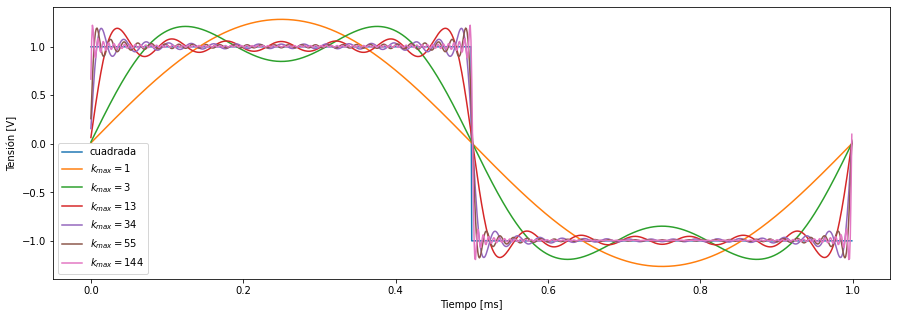

In [ ]:
y_gs = y_fourier(coeficientes_gs, PLOT_X, K_A_CALCULAR)
graficar(y_gs)

#5. Comparación entre métodos de solución utilizados

##a) Crear una tabla donde para cada $k_{max}$ se calcule el error de coeficientes ∆ obtenidos con los dos métodos programados. Para ello utilizar la siguiente propuesta de error: se definen $a_G \in \mathbb{R}^{1×k_{max}}$ y $b_G \in \mathbb{R}^{1×k_{max}}$ como los vectores con los coeficientes obtenidos utilizando la eliminación de Gauss con pivoteo parcial. De la misma manera, $a_{GS} \in \mathbb{R}^{1×k_{max}}$ y $b_{GS} \in \mathbb{R}^{1×k_{max}}$, son los vectores con los coeficientes obtenidos a través del método de Gauss-Seidel. Por lo tanto se definen los vectores $c_G = [a_G \; b_G]$ y $c_{GS} = [a_{GS} \; b_{GS}]$. <br/>Una forma útil de estudiar globalmente la diferencia entre los dos métodos es calculando $∆ =\|c_G − c_{GS}\|$ para cada $k_{max}$ elegido. O sea, se está computando la distancia entre las dos representaciones (algo asi como el “error”).

In [ ]:
# Los coeficientes[k] tienen tanto a los a y b intercalados, es la misma norma que si estuvieran primero los a y luego los b
print("k_max\t\tError")
for k in K_A_CALCULAR:
  print(f"{k}\t\t{np.linalg.norm(coeficientes_gs[k] - coeficientes_g[k], np.Inf) : .14e}")

k_max		Error
1		 0.00000000000000e+00
3		 1.73472347597681e-18
13		 2.77555756156289e-17
34		 2.77555756156289e-17
55		 5.55111512312578e-17
144		 1.11022302462516e-16


##b) Para cada $k_{max}$, calcular el error cuadrático global al utilizar el método de Gauss-Seidel, definido como $\varepsilon = \|x - s\| = \sqrt{\sum_{j=1}^{m}[x(t_j) - s(t_j)]^2}$. Luego, graficar dichos errores en un gráfico $\varepsilon$ vs $k_{max}$.


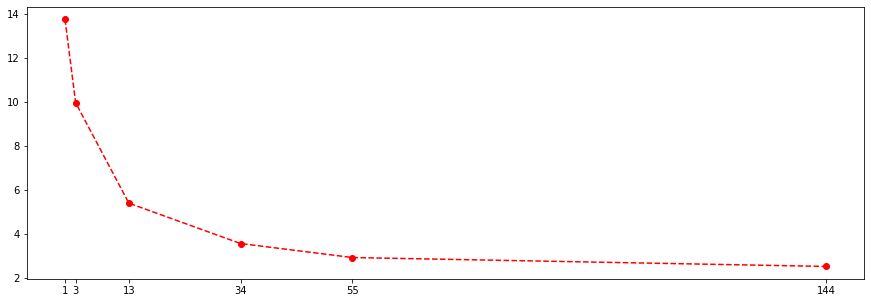

In [ ]:
e = [np.linalg.norm(y_gs[k] - PLOT_Y_CUADRADA) for k in K_A_CALCULAR]
plt.plot(K_A_CALCULAR, e, linestyle='--', marker='o', color='r')
plt.xticks(K_A_CALCULAR)
plt.show()

##c) Crear una tabla donde para cada kmax se muestre: a) el número de condición del sistema a resolver, es decir, el del problema de cuadrados mínimos; b) la norma infinito de la matriz del método de Gauss-Seidel; c) el radio espectral de la matriz del método de Gauss-Seidel. ¿Qué observaciones y conclusiones puede hacer? Se recomienda repasar la clase teórica sobre el tema

In [ ]:
print("k\t\ta)\t\t\t\tb)\t\t\t\tc)")
for k_max in K_A_CALCULAR:
  A, b = matrices_cmin[k_max]
  n_cond = np.linalg.norm(A, np.Inf) * np.linalg.norm(np.linalg.inv(A), np.Inf)
  T_GS = np.linalg.inv(tri(A, superior = False)) @ tri(A, k = 1)
  n_inf_gs = np.linalg.norm(T_GS, np.Inf)
  radio_espectral = max(np.abs(np.linalg.eig(T_GS)[0]))
  print(f"{k_max}\t\t{n_cond:.14e}\t\t{n_inf_gs:.14e}\t\t{radio_espectral:.14e}")


k		a)				b)				c)
1		1.00000000000000e+00		5.04944973966291e-17		2.54969426733818e-33
3		1.00000000000000e+00		7.10357789902443e-16		3.16685920928963e-20
13		1.00000000000002e+00		3.86509824367970e-15		2.66511350427750e-17
34		1.00000000000006e+00		1.32331964291748e-14		3.69612176108619e-16
55		1.00000000000016e+00		3.50782359661834e-14		1.27993351298232e-15
144		1.00000000000089e+00		2.05659261344765e-13		6.26671172534443e-15


**Número de condición del sistema $K$**: En todos los casos se encuentra prácticamente en 1 por lo que las matrices están muy bien condicionadas.
Siendo $\hat{x}$ una aproximación de la solución al sistema $Ax = b$, y $r = b - A\hat{x}$ el vector residual, tenemos que: 

$$\frac{\|x-\hat{x}\|}{\|x\|} \leq K \frac{\|r\|}{\|b\|}$$

Por lo que el hecho de que la matriz tenga números de condición tan cercanos a 1 nos permite acotar el error relativo de la solución con el vector residual.


**Norma infinito de la matriz del método de Gauss-Seidel:** Cualquier sucesión del tipo $x^{k} = T x^{k-1} + c$, si $\|T\| < 1$ para cualquier norma matricial, converge para cualquier semilla. En este caso, la matriz del método de Gauss-Seidel tienen normas muy inferiores a 1, por lo que es esperado que el sistema converja.

**Radio espectral de la matriz del método de Gauss-Seidel:** Sabemos que por propiedad del radio espectral de una matriz, este debe ser menor o igual que cualquier norma matricial de esta. Podemos observar que para cada $k_{max}$, esta propiedad se cumple.

##d) Existirá un valor de $k$ para el cual el error se haga prácticamente igual a cero? Justifique su respuesta, analizando el fenómeno de Gibbs y los errores involucrados en la resolución.


<p align = "justify">
No, tal como vimos en el punto 3e la convergencia de la serie al igual que la disminución de la energía del error no dependen de la cantidad de iteraciones que tenemos. Por Gibbs sabemos que ese error será despreciable pero no tiene sentido hablar de un $k_{max}$ para el cual el error sea 0. Respecto al análisis de sistemas lineales como Gauss Seidel el razonamiento es similar al análisis por series de Fourier ya que la sobre oscilación es idéntica al error cuadrático medio producido, con lo cual obtenemos la misma conclusión.
</p>

##e) Cuáles son los errores presentes en la resolución del problema? Indique en que parte de la resolución aparece cada uno de ellos.

El error principal en la resolución del problema es el error de truncamiento/redondeo: debido a la capacidad limitada de almacenamiento de la computadora y el uso de puntos flotantes de 64 bits, solo se almacenan resultados de hasta 15 cifras significativas correctas. Esto conlleva que tras varias cuentas sucesivas haya un arrastre del error que pueda afectar el resultado final.

De todas formas, en el item 5.c observamos que las matrices estan muy bien condicionadas. Esto implica que sus filas son bastante diferentes entre sí, el caso contrario sería por ejemplo dos filas muy similares pero con una diferencia relativa entre ellas muy chica. Por lo tanto, no se necesitarían muchas cifras para un cálculo bastante cercano al real de las operaciones realizadas.